<a href="https://colab.research.google.com/github/Ygrick/colab/blob/main/%D0%91%D0%B0%D0%BD%D0%BD%D0%B5%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ромайкин Игорь Дмитриевич
### ФПИИТ-03-21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path_of_file = '/content/drive/MyDrive/checkins.dat'
df = pd.read_csv(path_of_file,
                 sep="\|\s+",
                 skiprows=2,
                 names=['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'],
                 engine='python')

In [ ]:
df_test = df.dropna()
df_test = df_test.drop(['id', 'user_id', 'venue_id', 'created_at'], axis=1)
df_test = df_test[:100000]
df_test

,latitude,longitude
1,38.895112,-77.036366
3,33.800745,-84.410520
7,45.523452,-122.676207
9,40.764462,-111.904565
10,33.448377,-112.074037
...,...,...
233788,33.575000,-117.725556
233789,37.629349,-122.400087
233793,29.762884,-95.383061
233797,32.802955,-96.769923


In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
clustering = MeanShift(bandwidth = 0.3, bin_seeding=True, n_jobs = -1).fit(df_test)

In [ ]:
import numpy as np

labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
x = []
y = []
print("number of estimated clusters : %d" % n_clusters_)
for el in clustering.cluster_centers_:
  x.append(el[1])
  y.append(el[0])

number of estimated clusters : 1647


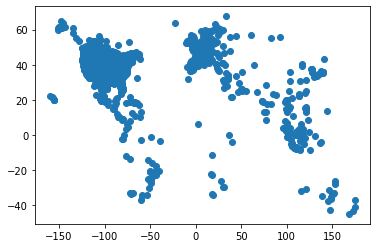

In [ ]:
import matplotlib.pyplot as plt
 
plt.scatter(x, y)
plt.show()

In [ ]:
df_test = df_test.assign(labels = clustering.labels_)
count = df_test['labels'].value_counts()[0:20].to_frame()
# count.index
count

,labels
0,14237
1,11228
2,4333
3,3729
4,3222
5,3031
6,2058
7,1993
8,1841
9,1841


In [ ]:
centers = []
for n in range(n_clusters_):
  if labels_unique[n] in (count.index):
    centers.append(clustering.cluster_centers_[n])

In [ ]:

for el in centers:
  print(f"{el[0]}, {el[1]}")

40.725608805634316, -73.9867149730416
33.43189684473769, -111.96881558672061
37.72425657652768, -122.39542699950007
41.88342729644118, -87.6450295961614
34.05564560980681, -118.31358664413438
38.900341411083495, -77.06941752557414
33.7940010273567, -84.39017622181849
47.60849181283721, -122.29201681932246
42.36244004856003, -71.0866931575786
33.777253830418, -117.93296739918792
32.86188590583993, -117.11821682429877
44.9649565975627, -93.25201861533834
37.42007523953871, -122.02485675154797
36.11125871927546, -115.15914216408562
32.86262800180273, -96.80907858715278
39.963863148800186, -75.16037346932522
39.74131610503326, -104.9864780297803
28.535454422969522, -81.3915951698398
30.278737398783242, -97.7416823217223
40.83350485810146, -73.57186467479524
